# 평가 (Evaluation)
## 모델의 성능 평가 지표

## 1. 정확도 (Accuracy)

In [ ]:
'''
# 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
                       예측 결과와 동일한 데이터 건수
       정확도 =      -----------------------------------
                           전체 예측 데이터 건수
                           
         : 가장 직관적으로 모델 예측 성능을 나타내는 지표
         : 주의 - 정확도 하나 만으로 성능을 평가하면 안됨 (왜곡이 발생할 수 있음)
         ex) 타이타닉 데이터의 경우 다른 조건 없이 성별만 가지고 분석하면 여성은 생존, 남성은 사망.. 이런 왜곡된 결과가 도출될 수 있음.
         
         : 불균형한 데이터 세트일 경우에 정확도의 맹점이 더 잘드러난다.
'''

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

# 분류모델 - 단순히 sex feature가 1이면 0, 그렇지 않으면 1로 예측
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predic(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [2]:
# 전처리 작업, 필요없는 카테고리를 없애는 작업
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# null 처리
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 필요없는 카테고리 제거
def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def encoding_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 최종 전처리 수행 함수
def transform_features(df):
    df = fillna(df)
    df = drop_feature(df)
    df = encoding_features(df)
    return df

In [3]:
# 전처리를 한번에 하는 함수를 이용해서 원본 데이터를 다시 로딩 - 전처리 수행
titanic_df = pd.read_csv('data/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 학습한 train 세트를 전처리
X_titanic_df = transform_features(X_titanic_df)

# 학습 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [4]:
from sklearn.metrics import accuracy_score

# 방금 만든 모델로 학습/예측/평가 수행
my_clf = DummyClassifier()
my_clf.fit(X_train, y_train)

my_pred = my_clf.predic(X_test)
print('DummyClassifier accuracy : {0:.4f}'.format(accuracy_score(y_test, my_pred)))

DummyClassifier accuracy : 0.8324


## 2. 오차행렬 (confusion matrix)

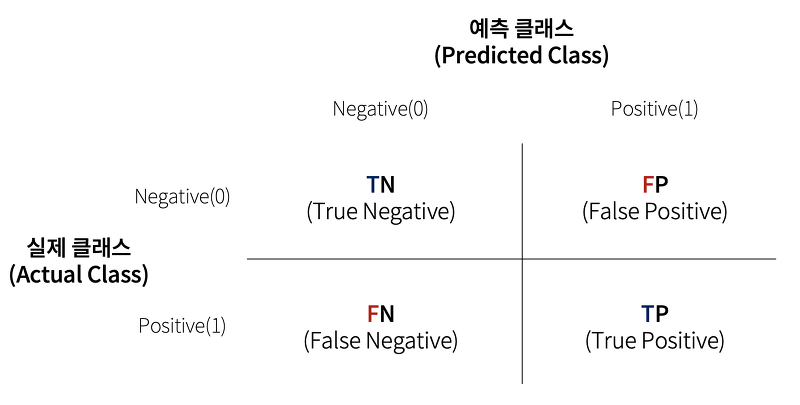

In [5]:
from IPython.display import Image
Image('data/confusion_matrix.png')

In [ ]:
'''
# 오차행렬(혼동 행렬)
 : 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confusion) 있는지도 함께 보여주는 지표
 : 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지도 함께 보여주는 지표
 
 - TN : 예측값을 Negative 값 0으로 예측했고, 실제값 역시 Negative 값 0인 경우
 - FP : 예측값을 Positive 값 1으로 예측했고, 실제값 역시 Negative 값 0인 경우
 - FN : 예측값을 Negative 값 0으로 예측했고, 실제값 역시 Positive 값 1인 경우
 - TP : 예측값을 Positive 값 1으로 예측했고, 실제값 역시 Positive 값 1인 경우
'''

In [6]:
# 불균형한 데이터 세트로 검증
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class FakeClassifier(BaseEstimator):
    def fit(selt, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [8]:
# 데이터 로딩
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
digits.data.shape

(1797, 64)

In [12]:
digits.target.shape

(1797,)

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [10]:
# digits label이 7이면 True임. 사이킷런이 인식하려면 숫자가 되어야 하므로 1로 변환 - 나머지는 0으로 변환 (불균형한 데이터)
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [12]:
# FakeClassifier로 학습, 예측, 정확도 평가
fake_clf = FakeClassifier()
fake_clf.fit(X_train, y_train)
fake_pred = fake_clf.predict(X_test)
print('모든 예측을 0으로 하는 모델의 정확도 : {:.4f}'.format(accuracy_score(y_test, fake_pred)))

모든 예측을 0으로 하는 모델의 정확도 : 0.9000


In [ ]:
# 현재 정확도는 90%, 즉 그냥 찍어도 90%의 확률 

In [17]:
print('레이블 테스트 세트 크기 : ', y_test.shape)

레이블 테스트 세트 크기 :  (450,)


In [18]:
print('레이블 테스트 세트의 0, 1 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트의 0, 1 분포도
0    405
1     45
dtype: int64


In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [ ]:
'''
# 오차행렬 결과를 보고 더 정확한 분석이 가능해짐
# 7이 아니라고 예측했고 실제 7이 아닌 결과로 예측한 개수가 405건,
# 7이 아니라고 예측했지만 실제 7인 개수가 45건

              (TN + TP)
# 정확도 = --------------------
          (TN + FP + FN + TP)
'''

## 3. 정밀도(Precision)와 재현율(Recall)

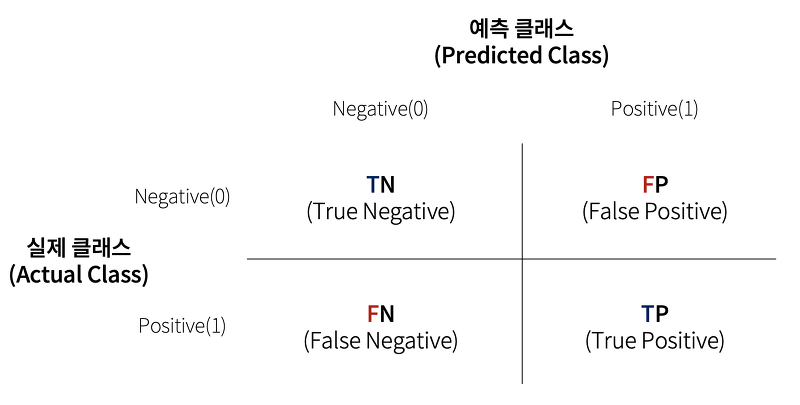

In [14]:
from IPython.display import Image
Image('data/confusion_matrix.png')

In [ ]:
'''
# 불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표들
# Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표들

# 정밀도 = TP / (FP + TP)
 : 예측을 Positive로 한 대상 중에서 예측과 실제 값이 Positive로 일치한 데이터의 비율
 : Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가지표 (양성 예측도)
 
# 재현율 = TP / (FN + TP)
 : 실제 양성 중 정확히 양성이라고 식별된 사례 비율. 민감도(Sensitivity), TPR(True Positive Rate)
'''

In [ ]:
'''
# 정밀도와 재현율은 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주 될 수 있음에 유의!
 - 재현율이 상대적으로 더 중요한 지표 : 실제 Positive 양성인 데이터 예측을 Negative 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우
   ex) 암 판단 모델 : 실제 Positive 환자를 Negative로 잘못 판단해 버릴 경우 오류의 댓가가 너무 큼.
                     반대로 Negative 환자를 Positive로 잘못 판단해도 검사비 정도만 소모되므로 허용 범위
                     
      금융 사기 모델 : 실제 금융 사기 Positive를 Negative로 잘못 판단해 버린 경우 오류의 댓가가 너무 큼.
                     반대로 정상금융거래 Negative 를 금융 사기인 Positive로 잘못 판단해 버리면 역시 회사 입장에서는 허용 범위
                     더해서 고객에게는 금융사기 혐의를 부여하게 됨. 윤리적으로 주의해야할 부분.
    
 - 정밀도가 상대적으로 더 중요한 지표 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우
   ex) 스팸메일 여부를 판단하는 모델 : 실제 Negative인 일반(정상) 메일을 Positive인 스팸메일로 분류해버리는 경우 => 사용자가 메일을 아예 받지 못하는 경우가 생기므로 큰 영향이 생김
                                     실제 Positive인 스팸 메일을 Negative인 일반(정상) 메일로 분류해버리는 경우 => 일단 메일을 받아서 스팸처리가 가능


# 정리
 : 공식을 살펴보면 재현율과 정밀도 모두 TP를 높이는데 초점이 있다.
   그리고 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점이 있다.
   이 특성에 따라서 재현율과 정밀도는 상호 보완적인 지표이다.
 : 가장 좋은 성능은 둘 다 모두 높은 수치를 얻는 것이고 상호 보완적이므로 어느 하나가 매우 높고 하나는 매우 낮다면 바람직 하지 않다.
    
'''

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 : ', precision_score(y_test, fake_pred))
print('재현율 : ', recall_score(y_test, fake_pred))

정밀도 :  0.0
재현율 :  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('---- 오차 행렬 ----')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [20]:
# 타이타닉 데이터를 재평가해보기
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 평가
get_clf_eval(y_test, pred)

---- 오차 행렬 ----
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도와 재현율이 차이가 났을 때 조정이 가능한가?

## 정밀도/재현율 트레이드 오프 (Trade-off)

In [ ]:
'''
# 분류하는 업무의 특성을 보고 분류의 결정임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 조정 가능함.
  정밀도와 재현율은 상호 보완적인 지표이므로 어느 한쪽을 높이면 다른 한쪽의 수치가 떨어지게 됨. 이를 정밀도/재현율 트레이드 오프라고 함.

# 결정임계값
 : 보통 모델이 판단을 할 때 특정 값을 기준으로 하여 이 기준값보다 확률이 크면 Positive, 낮으면 Negative라고 결정을 함.
   이 기준값이 결정임계값. 일반적으로 이진분류에서는 0.5가 보통
'''

In [24]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [25]:
# 개별 데이터로 예측 확률을 반환하는 메소드
pred_proba = lr_clf.predict_proba(X_test)
pred_proba.shape

(179, 2)

In [26]:
pred_proba[:3]

array([[0.46184057, 0.53815943],
       [0.87866995, 0.12133005],
       [0.87716959, 0.12283041]])

In [27]:
# 임계값에 따른 정밀도/재현율 값을 추출
from sklearn.metrics import precision_recall_curve

In [29]:
# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class_1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제 데이터 세트와 레이블 값이 1일 때의 예측 확률을 추출
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_1)

print(precisions.shape, recalls.shape, thresholds.shape)

(144,) (144,) (143,)


In [ ]:
# 정밀도, 재현율 변화 곡선

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [33]:
def precision_recall_curve_plt(y_test, pred_proba_class_1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_1)
    
    # x 축은 임계값, y축은 정밀도, 재현율 값
    plt.figure(figsize=(15, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    # x 축 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # 각 축에 Label
    plt.xlabel('Treshold value')
    plt.ylabel('Precision & Recall Value')
    plt.legend()
    plt.grid()
    plt.show()   

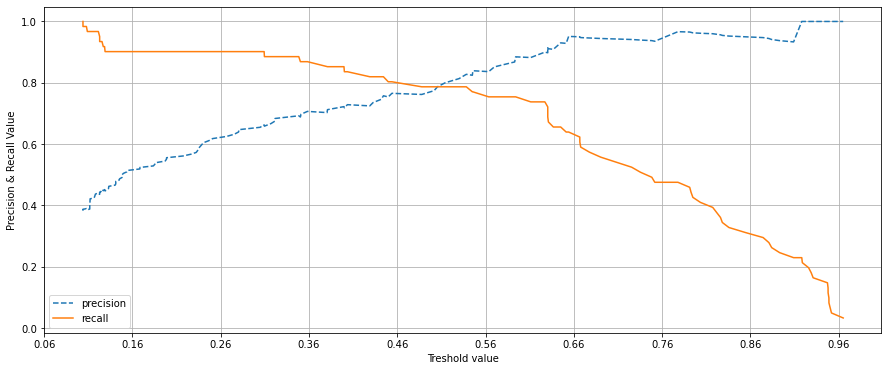

In [34]:
precision_recall_curve_plt(y_test, lr_clf.predict_proba(X_test)[:, 1])

## 4. F1 Score

In [ ]:
'''
정밀도와 재현율을 결합한 지표
정밀도와 재현율이 어느 한쪽으로 치우치지 않은 수치를 보일 때 상대적으로 높은 수치를 보임

'''

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 score : {0:.4f}'.format(f1))

F1 score : 0.7805


In [ ]:
# F1 score를 변화시키려면 정밀도와 재현율을 조정하면서 학습을 시켜보면 된다.
# 정밀도와 재현율은 임계값을 통해 조정함

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred, thresholds):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('---- 오차 행렬 ----')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    print('-'*50)
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_text)
get_clf_eval(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [26]:
from sklearn.preprocessing import Binarizer

def get_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [28]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.4
---- 오차 행렬 ----
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 :  0.45
---- 오차 행렬 ----
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1 : 0.7840
임계값 :  0.5
---- 오차 행렬 ----
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1 : 0.7805
임계값 :  0.55
---- 오차 행렬 ----
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1 : 0.7931
임계값 :  0.6
---- 오차 행렬 ----
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1 : 0.8036
